In [2]:
# Lab 06 Data visualization with matplotlib and seaborn

In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

In [62]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [3]:
df.head()

lat       lon          city         country
date                                                                  
2014-05-14 09:07:00  51.481292 -0.451011  West Drayton  United Kingdom
2014-05-14 09:22:00  51.474005 -0.450999      Hounslow  United Kingdom
2014-05-14 10:51:00  51.478199 -0.446081      Hounslow  United Kingdom
2014-05-14 11:24:00  51.478199 -0.446081      Hounslow  United Kingdom
2014-05-14 11:38:00  51.474146 -0.451562      Hounslow  United Kingdom

In [4]:
rs.head()

lat       lon              date      city         country
0  51.478199 -0.446081  05/14/2014 10:51  Hounslow  United Kingdom
1  38.781775 -9.137544  05/14/2014 15:11    Lisbon        Portugal
2  38.771939 -9.128911  05/14/2014 15:41    Lisbon        Portugal
3  38.742987 -9.147780  05/14/2014 16:11    Lisbon        Portugal
4  38.693780 -9.206363  05/15/2014 14:19    Lisbon        Portugal

In [ ]:
# define the font styles

In [5]:
title_font = fm.FontProperties(family='DejaVu Sans', style='normal', size=15, weight='normal', stretch='normal')
label_font = fm.FontProperties(family='DejaVu Sans', style='normal', size=12, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='DejaVu Sans', style='normal', size=10, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='DejaVu Sans', style='normal', size=10, weight='normal', stretch='normal')

In [ ]:
# First up: Bar Charts

In [10]:
# Q1: Can you draw a bar chart for the country by using matplotlib and seaborn? 
# You can use the df dataframe.
# Please style the chart to make it look nicer
# such as figsize, width, alpha, color, edgecolor, grid, xlim, and ylim

In [14]:
# get the most visited countries

In [6]:
countries = df['country'].value_counts()
countries

Spain                     646
Portugal                  256
Germany                   225
Czech Republic            130
Poland                    104
Turkey                     94
Greece                     82
Montenegro                 51
Macedonia (FYROM)          34
Kosovo                     30
Croatia                    30
Albania                    29
Bosnia and Herzegovina     26
Serbia                     15
United Kingdom              7
Name: country, dtype: int64

In [ ]:
# style the chart to make it look nicer

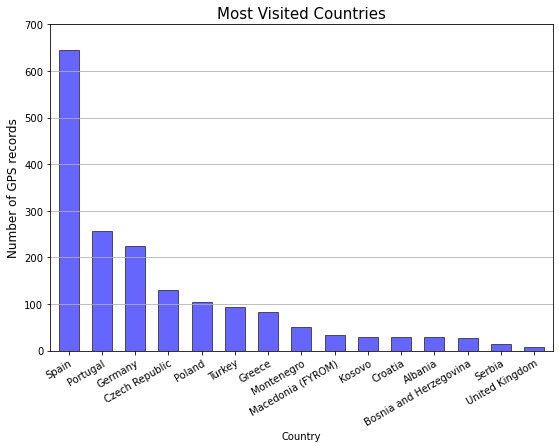

In [8]:
# default matplotlib bar chart
# countries.plot(kind='bar')

ax = countries.plot(kind='bar', figsize=[9, 6], width=0.6, alpha=0.6, 
                    color='b', edgecolor='k', grid=False, ylim=[0, 700])

ax.set_xticklabels(countries.index, rotation=30, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Most Visited Countries', fontproperties=title_font)
ax.set_xlabel('Country')
ax.set_ylabel('Number of GPS records', fontproperties=label_font)

plt.show()

In [ ]:
# Next: scatter plots as simple maps

In [ ]:
# Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 
# You can use the rs dataframe.
# Please style the chart to make it look nicer with good size and alpha settings.

<AxesSubplot:xlabel='lon', ylabel='lat'>

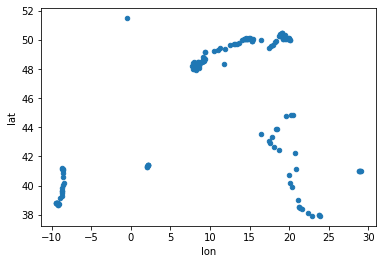

In [9]:
rs.plot(kind='scatter', x='lon', y='lat')

In [ ]:
# get a single representative point from the data set for each of the most visited cities 

In [10]:
most_visited_cities_index = df['city'].value_counts().head(8).index
print(most_visited_cities_index)
most_visited_cities = pd.DataFrame(df[df['city'].isin(most_visited_cities_index)])
most_visited_cities.drop_duplicates(subset=['city'], keep='first', inplace=True)
most_visited_cities

Index(['Barcelona', 'Lisbon', 'T端bingen', 'Prague', 'Istanbul', 'Athens',
       'Krakow', 'Porto'],
      dtype='object')


lat        lon       city         country
date                                                                
2014-05-14 15:11:00  38.781775  -9.137544     Lisbon        Portugal
2014-05-17 15:13:00  41.145266  -8.610441      Porto        Portugal
2014-05-19 00:04:00  41.377119   2.151632  Barcelona           Spain
2014-05-30 17:59:00  50.097330  19.895394     Krakow          Poland
2014-06-02 12:10:00  50.087729  14.660600     Prague  Czech Republic
2014-06-06 19:06:00  48.518270   9.058023   T端bingen         Germany
2014-07-05 05:32:00  37.967669  23.729203     Athens          Greece
2014-07-06 20:42:00  40.982352  28.815756   Istanbul          Turkey

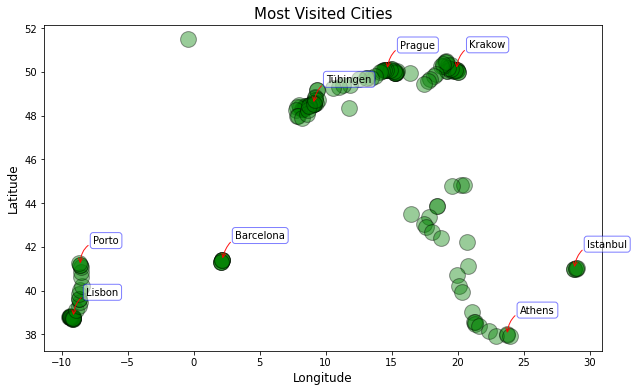

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x=rs['lon'], y=rs['lat'], c='g', edgecolor='k', alpha=.4, s=250)

# set font of tick labels
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

# set title, axis labels, background color
ax.set_title('Most Visited Cities', fontproperties=title_font)
ax.set_xlabel('Longitude', fontproperties=label_font)
ax.set_ylabel('Latitude', fontproperties=label_font)

# annotate each of the most visited cities on the map
bbox_style = {'boxstyle':'round', 'color':'b', 'fc':'w', 'alpha':0.5}
arrowprops_style = {'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 'color':'r', 'alpha':0.9}
annotate_cities = lambda row: ax.annotate(row['city'], 
                                          xy=(row['lon'], row['lat']),
                                          xytext=(row['lon'] + 1, row['lat'] + 1),
                                          fontproperties=annotation_font,
                                          bbox=bbox_style,
                                          xycoords='data',
                                          arrowprops=arrowprops_style)
most_visited_cities.apply(annotate_cities, axis=1)
    
plt.show()

In [25]:
# Line charts, with annotation

In [ ]:
# Q4: Draw a  matplotlib and seaborn line chart from countdata. 
# Please style the chart to make it look nicer with good size and alpha settings.

In [ ]:
# get the count of records by date

In [55]:
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

In [146]:
# x = countdata.index.tolist()
# print(x)

[datetime.date(2014, 5, 14), datetime.date(2014, 5, 15), datetime.date(2014, 5, 16), datetime.date(2014, 5, 17), datetime.date(2014, 5, 18), datetime.date(2014, 5, 19), datetime.date(2014, 5, 20), datetime.date(2014, 5, 21), datetime.date(2014, 5, 22), datetime.date(2014, 5, 23), datetime.date(2014, 5, 24), datetime.date(2014, 5, 25), datetime.date(2014, 5, 26), datetime.date(2014, 5, 27), datetime.date(2014, 5, 28), datetime.date(2014, 5, 29), datetime.date(2014, 5, 30), datetime.date(2014, 5, 31), datetime.date(2014, 6, 1), datetime.date(2014, 6, 2), datetime.date(2014, 6, 3), datetime.date(2014, 6, 4), datetime.date(2014, 6, 5), datetime.date(2014, 6, 6), datetime.date(2014, 6, 7), datetime.date(2014, 6, 8), datetime.date(2014, 6, 9), datetime.date(2014, 6, 10), datetime.date(2014, 6, 11), datetime.date(2014, 6, 12), datetime.date(2014, 6, 13), datetime.date(2014, 6, 14), datetime.date(2014, 6, 15), datetime.date(2014, 6, 16), datetime.date(2014, 6, 17), datetime.date(2014, 6, 18), 

In [145]:
# x1 = np.array(x)
# print(x1)

[datetime.date(2014, 5, 14) datetime.date(2014, 5, 15)
 datetime.date(2014, 5, 16) datetime.date(2014, 5, 17)
 datetime.date(2014, 5, 18) datetime.date(2014, 5, 19)
 datetime.date(2014, 5, 20) datetime.date(2014, 5, 21)
 datetime.date(2014, 5, 22) datetime.date(2014, 5, 23)
 datetime.date(2014, 5, 24) datetime.date(2014, 5, 25)
 datetime.date(2014, 5, 26) datetime.date(2014, 5, 27)
 datetime.date(2014, 5, 28) datetime.date(2014, 5, 29)
 datetime.date(2014, 5, 30) datetime.date(2014, 5, 31)
 datetime.date(2014, 6, 1) datetime.date(2014, 6, 2)
 datetime.date(2014, 6, 3) datetime.date(2014, 6, 4)
 datetime.date(2014, 6, 5) datetime.date(2014, 6, 6)
 datetime.date(2014, 6, 7) datetime.date(2014, 6, 8)
 datetime.date(2014, 6, 9) datetime.date(2014, 6, 10)
 datetime.date(2014, 6, 11) datetime.date(2014, 6, 12)
 datetime.date(2014, 6, 13) datetime.date(2014, 6, 14)
 datetime.date(2014, 6, 15) datetime.date(2014, 6, 16)
 datetime.date(2014, 6, 17) datetime.date(2014, 6, 18)
 datetime.date(2014

In [128]:
# countdata1 = pd.to_datetime(countdata.index)

In [129]:
# print(countdata1)

DatetimeIndex(['2014-05-14', '2014-05-15', '2014-05-16', '2014-05-17',
               '2014-05-18', '2014-05-19', '2014-05-20', '2014-05-21',
               '2014-05-22', '2014-05-23', '2014-05-24', '2014-05-25',
               '2014-05-26', '2014-05-27', '2014-05-28', '2014-05-29',
               '2014-05-30', '2014-05-31', '2014-06-01', '2014-06-02',
               '2014-06-03', '2014-06-04', '2014-06-05', '2014-06-06',
               '2014-06-07', '2014-06-08', '2014-06-09', '2014-06-10',
               '2014-06-11', '2014-06-12', '2014-06-13', '2014-06-14',
               '2014-06-15', '2014-06-16', '2014-06-17', '2014-06-18',
               '2014-06-19', '2014-06-20', '2014-06-21', '2014-06-22',
               '2014-06-23', '2014-06-24', '2014-06-25', '2014-06-26',
               '2014-06-27', '2014-06-28', '2014-06-29', '2014-06-30',
               '2014-07-01', '2014-07-02', '2014-07-03', '2014-07-04',
               '2014-07-05', '2014-07-06', '2014-07-07', '2014-07-08',
      

In [137]:
countdata.values

array([36, 61, 57, 64, 50, 32, 36, 25, 22, 34, 18, 20, 27, 30, 18, 25, 20,
       30, 42, 40, 29, 32, 31, 35, 32, 33, 41, 45, 31, 32, 28, 23, 31, 54,
       57, 64, 60, 17, 13, 10, 12, 14, 11,  8, 12, 38, 19, 14,  8, 26, 17,
       15, 51, 40, 43, 35, 11])

In [ ]:
# default matplotlib line chart

<AxesSubplot:>

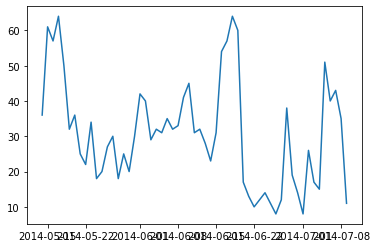

In [116]:
countdata.plot(kind='line')

In [40]:
# create a nicer line plot

In [147]:
from scipy.interpolate import make_interp_spline

x1
y=countdata.values
# x1 = np.array(x)
# y1 = np.array(y)


xnew = np.linspace(x1.min(), x1.max(), 300)

print(xnew)
# ynew = make_interp_spline(x1, y1)(xnew)


# plt.plot(x1, y1)

TypeError: unsupported operand type(s) for *: 'datetime.date' and 'float'

In [39]:

from scipy.interpolate import make_interp_spline

x=[]
y=[]
x1 = np.array(x)
y1 = np.array(y)
xnew = np.linspace(x1.min(), x1.max(), 300)
ynew = make_interp_spline(x1, y1)(xnew)


plt.plot(x1, y1)


fig, ax = plt.subplots()
ax = countdata.plot(kind='line',
                    figsize=[10, 6],
                    linewidth='2', 
                    alpha=0.8,
                    marker='o',
                    color='b')

# add annotations for explanation
ax.annotate('Left the EU', 
                 xy=('2014-06-19', 64),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                 xycoords='data')

ax.annotate('Had WiFi', 
                 xy=('2014-06-23', 38),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                 xycoords='data')

ax.annotate('Return to EU', 
                 xy=('2014-07-01', 52),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                 xycoords='data')

# set the x-ticks/labels for every nth row of the data: 1 tick mark per horizontal inch
n = len(countdata) / int(fig.get_size_inches()[0]) #interval between tick marks
xtick_data = countdata.iloc[range(0, len(countdata), 3)] #rows spaced apart by that interval (ie, weekly)
ax.xaxis.set_ticks(xtick_data.index) #set the tick labels as the dates of those rows
ax.set_xlim(['2014-05-13', '2014-07-10'])


ax.xaxis.grid(True)
ax.yaxis.grid(True)

# set tick labels, axis labels, and title
ax.set_xticklabels(xtick_data.index, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_title('Number of records in the data set, by date', fontproperties=title_font)
ax.set_xlabel('Date', fontproperties=label_font)
ax.set_ylabel('Number of GPS records', fontproperties=label_font)

plt.show()


ValueError: zero-size array to reduction operation minimum which has no identity

In [47]:
# Q5: Now you try: re-create the plot above with different line widths, colors, and point markers. 
# Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.
# experiment with a more advanced challenge like smoothing the line:
# - https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
# - https://stackoverflow.com/questions/25825946/generating-smooth-line-graph-using-matplotlib

In [ ]:
# Q6: draw a pie chart for cities.
# Please style the chart to make it look nicer.

In [ ]:
#Pie charts

In [74]:
cities = df['city'].value_counts()
print(cities.count())
cities.head()

113


Barcelona    632
Lisbon       158
T端bingen     131
Prague        97
Istanbul      94
Name: city, dtype: int64

In [ ]:
# draw a pie chart nightmare

<AxesSubplot:ylabel='city'>

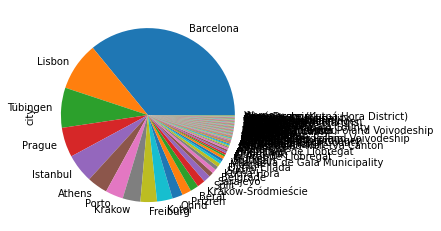

In [46]:
cities.plot(kind='pie')

In [99]:
def pie_chart(fractions, #values for the wedges
              labels, #labels for the wedges
              title = '', #title of the pie chart
              cm_name = 'Pastel1', #name of the matplotlib colormap to use
              autopct = lambda x: str(round(x, 1)) + '%', #format the value text on each pie wedge
              labeldistance = 1.05, #where to place wedge labels in relation to pie wedges
              shadow = False, #shadow around the pie
              startangle = 180, #rotate 90 degrees to start the top of the data set on the top of the pie
              edgecolor = 'w', #color of pie wedge edges
              width = 10, #width of the figure in inches
              height = 10, #height of the figure in inches
              grouping_threshold = None, #group all wedges below this value into one 'all others' wedge
              grouping_label = None): #what to label the grouped wedge
    
    # if the user passed a threshold value, group all fractions lower than it into one 'misc' pie wedge
    if not grouping_threshold==None:
        
        # if user didn't pass a label, apply a default text
        if grouping_label == None:
            grouping_label = 'Others'

        # select the rows greater than the cut-off value
        row_mask = fractions > grouping_threshold
        meets_threshold = fractions[row_mask]

        # group all other rows below the cut-off value
        all_others = pd.Series(fractions[~row_mask].sum())
        all_others.index = [grouping_label]

        # append the grouped row to the bottom of the rows to display
        fractions = meets_threshold.append(all_others)
        labels = fractions.index
    
    # get the color map then pull 1 color from it for each pie wedge we'll draw
    color_map = cm.get_cmap(cm_name)
    num_of_colors = len(fractions)
    colors = color_map([x/float(num_of_colors) for x in range(num_of_colors)])
    
    # create the figure and an axis to plot on
    fig, ax = plt.subplots(figsize=[width, height])
    
    # plot the pie
    wedges = ax.pie(fractions, 
                    labels = labels, 
                    labeldistance = labeldistance,
                    autopct = autopct,
                    colors = colors,
                    shadow = shadow, 
                    startangle = startangle)
    
    # change the edgecolor for each wedge
    for wedge in wedges[0]:
        wedge.set_edgecolor(edgecolor)
    
    # set the title and show the plot
    ax.set_title(title, fontproperties=title_font)
    plt.show()

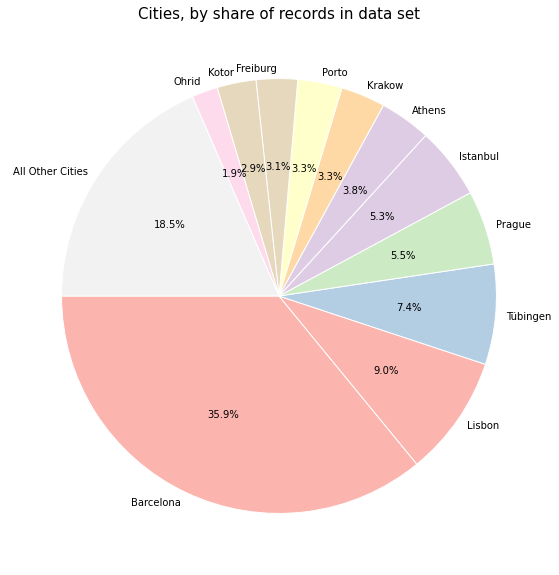

In [100]:
cities = df['city'].value_counts()

pie_chart(fractions = cities,
          labels = cities.index,
          title = 'Cities, by share of records in data set',
          grouping_threshold = 30,
          grouping_label = 'All Other Cities')